### Data Loading

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

file_path = './data/high_diamond_ranked_10min.csv'
df = pd.read_csv(file_path)
print("--- Data Loaded ---")

--- Data Loaded ---


### Initial info about the data

In [12]:
print("\n--- Data Info ---")
df.info()

print("\n--- Missing Values Check ---")
print(df.isnull().sum().to_string())

print("\n--- First 5 Rows ---")
print(df.head())


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null

### Data preparation

In [13]:
print("\n--- Preparing Data for Modeling ---")

TARGET = 'blueWins'

if 'gameId' in df.columns:
    df = df.drop('gameId', axis=1)
    print("Dropped 'gameId' column.")

features_to_drop = [
    'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills', 'redDeaths',
    'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
    'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled',
    'redTotalJungleMinionsKilled', 'redGoldPerMin', 'redCSPerMin'
]

X = df.drop([TARGET] + features_to_drop, axis=1)
y = df[TARGET]

print(f"\nTarget variable: '{TARGET}'")
print(f"Number of features: {X.shape[1]}")
print("Final features used for modeling:")
print(X.columns.to_list())


--- Preparing Data for Modeling ---
Dropped 'gameId' column.

Target variable: 'blueWins'
Number of features: 21
Final features used for modeling:
['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redGoldDiff', 'redExperienceDiff']


### Splitting the data into training and test sets

In [14]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 7903 samples
Test set size: 1976 samples


### Creating model and fitting it with the data

In [15]:
print("\n--- Creating and Training the Decision Tree Model ---")

dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

print("Model training complete.")


--- Creating and Training the Decision Tree Model ---
Model training complete.


### Evaluating the model on Test set

In [16]:
print("\n--- Evaluating Model on the Test Set ---")

y_pred = dt_model.predict(X_test)

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Blue Loses (0)', 'Blue Wins (1)']))


--- Evaluating Model on the Test Set ---

Confusion Matrix:
[[642 348]
 [218 768]]

Classification Report:
                precision    recall  f1-score   support

Blue Loses (0)       0.75      0.65      0.69       990
 Blue Wins (1)       0.69      0.78      0.73       986

      accuracy                           0.71      1976
     macro avg       0.72      0.71      0.71      1976
  weighted avg       0.72      0.71      0.71      1976



### Feature Importance Analysis

In [17]:
print("\n--- Feature Importances ---")
importances = pd.Series(dt_model.feature_importances_, index=X.columns)
sorted_importances = importances.sort_values(ascending=False)
print(sorted_importances.to_string())


--- Feature Importances ---
redGoldDiff                     0.835789
blueGoldDiff                    0.106948
redExperienceDiff               0.024184
blueDragons                     0.022793
blueExperienceDiff              0.008050
blueTotalGold                   0.002235
blueEliteMonsters               0.000000
blueAssists                     0.000000
blueHeralds                     0.000000
blueTowersDestroyed             0.000000
blueWardsDestroyed              0.000000
blueAvgLevel                    0.000000
blueTotalExperience             0.000000
blueTotalMinionsKilled          0.000000
blueTotalJungleMinionsKilled    0.000000
blueDeaths                      0.000000
blueKills                       0.000000
blueCSPerMin                    0.000000
blueGoldPerMin                  0.000000
blueFirstBlood                  0.000000
blueWardsPlaced                 0.000000


### Robust Evaluation with 10-Fold Cross-Validation

In [18]:
print("\n--- Performing 10-Fold Cross-Validation ---")

cv_model = DecisionTreeClassifier(max_depth=4, random_state=42)

cv_accuracy = cross_val_score(cv_model, X, y, cv=10, scoring='accuracy')
cv_precision = cross_val_score(cv_model, X, y, cv=10, scoring='precision')
cv_recall = cross_val_score(cv_model, X, y, cv=10, scoring='recall')
cv_f1 = cross_val_score(cv_model, X, y, cv=10, scoring='f1')

print(f"\nAverage Accuracy: {np.mean(cv_accuracy):.4f} (+- {np.std(cv_accuracy):.4f})")
print(f"Average Precision: {np.mean(cv_precision):.4f} (+- {np.std(cv_precision):.4f})")
print(f"Average Recall (Sensitivity): {np.mean(cv_recall):.4f} (+- {np.std(cv_recall):.4f})")
print(f"Average F1-Score: {np.mean(cv_f1):.4f} (+- {np.std(cv_f1):.4f})")


--- Performing 10-Fold Cross-Validation ---

Average Accuracy: 0.7222 (+- 0.0117)
Average Precision: 0.7315 (+- 0.0162)
Average Recall (Sensitivity): 0.7020 (+- 0.0385)
Average F1-Score: 0.7157 (+- 0.0175)


### Decision Tree Visualization


--- Visualizing the Decision Tree ---
Decision tree has been saved to 'decision_tree.png'


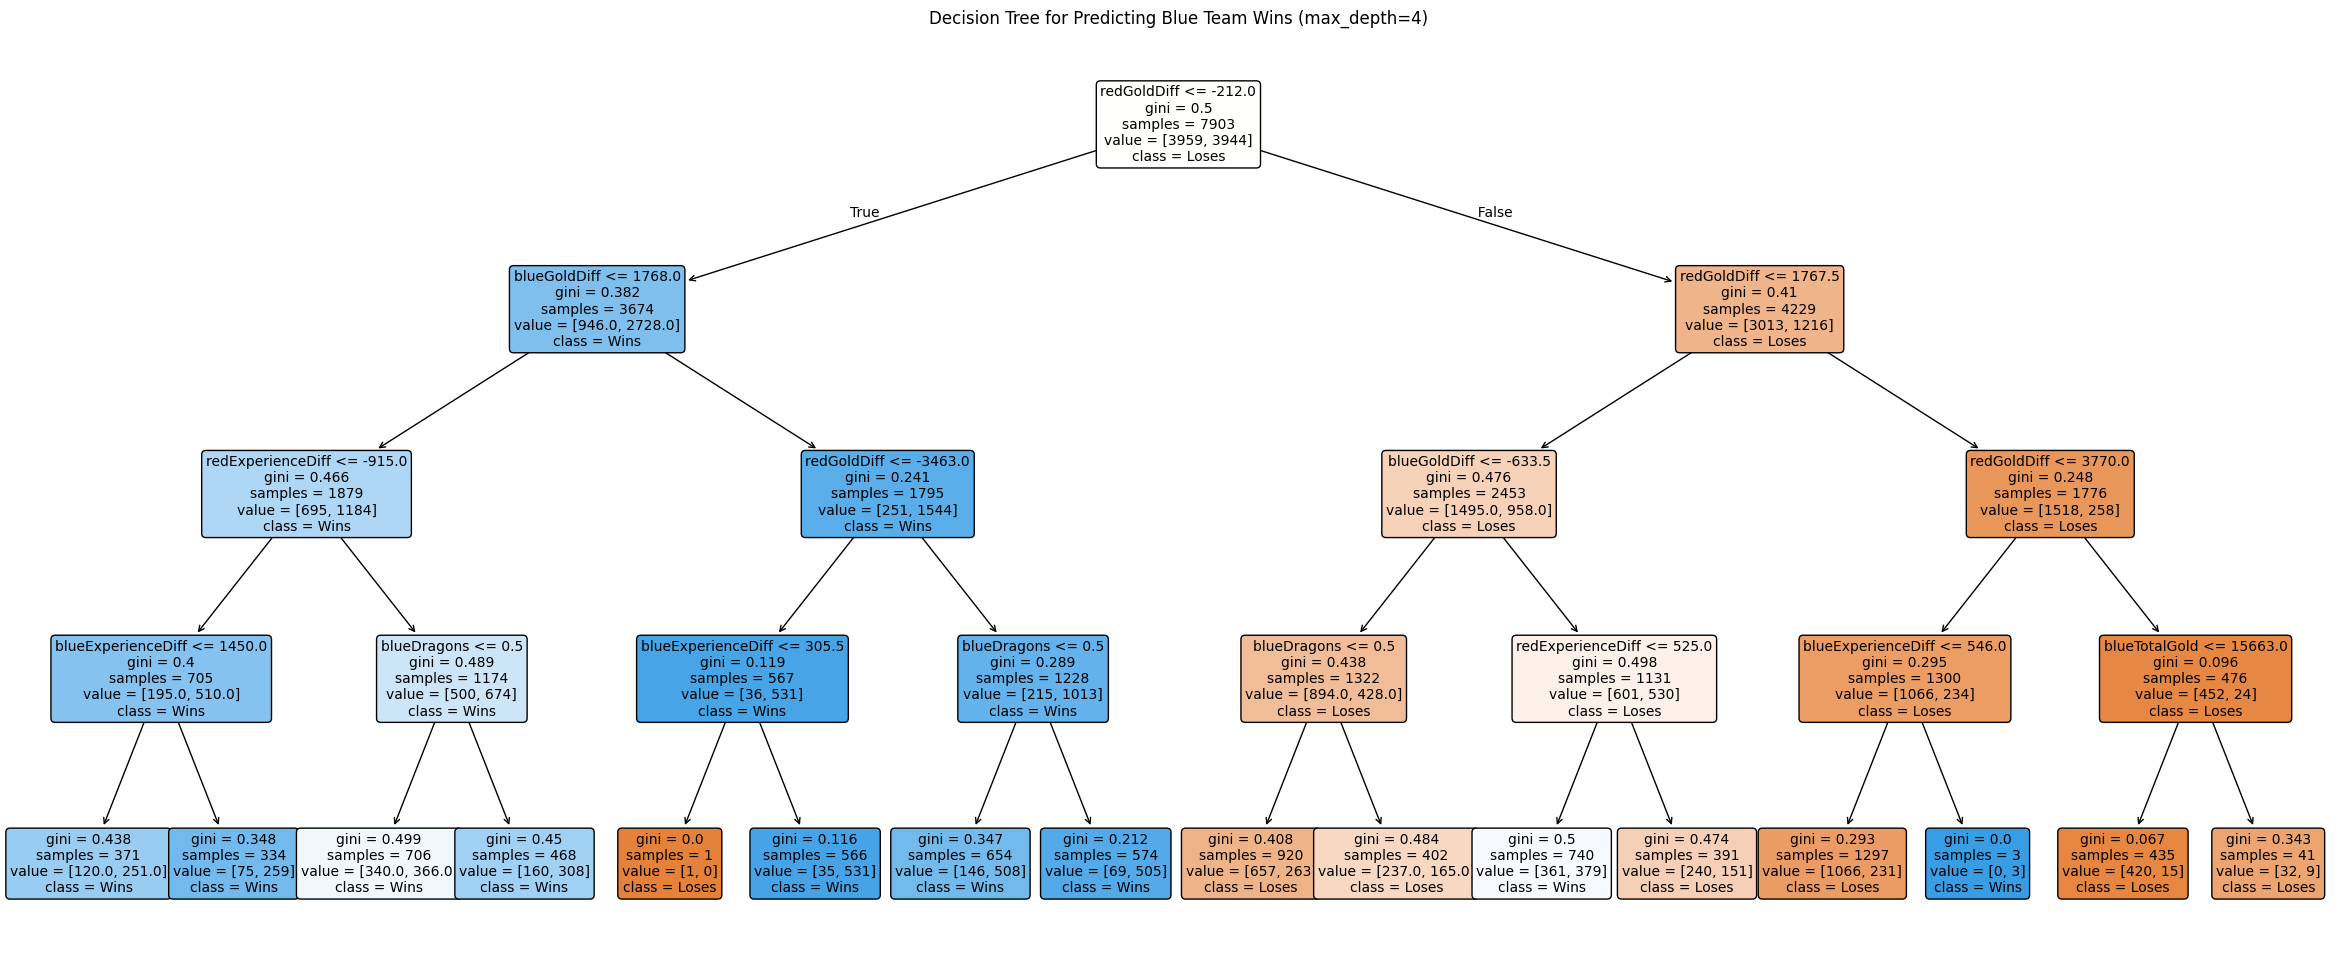

In [19]:
print("\n--- Visualizing the Decision Tree ---")
plt.figure(figsize=(30, 12))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['Loses', 'Wins'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Predicting Blue Team Wins (max_depth=4)")
plt.savefig("decision_tree.png")
print("Decision tree has been saved to 'decision_tree.png'")